In [27]:
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Confidence Regions

Here we are going to analyze the Fisher Matrices obtain for each cosmology: 

1. Confidence Regions

2. Figure of Merit (FoM)

# $\Lambda CDM$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_9$

In [28]:
Fi_S_F = np.array([[5539174.68302178, 6547487.58749152, 1168793.55054772,
        -349878.67361071, 2177097.82694685],
       [6547487.58749152, 8042160.65214351, 1594676.27326857,
        -461924.67111442, 2668837.56555961],
       [1168793.55054772, 1594676.27326857,  400497.28637532,
        -114739.82470749,  520786.4211808 ],
       [-349878.67361071, -461924.67111442, -114739.82470749,
          67206.16863642, -125539.83006722],
       [2177097.82694685, 2668837.56555961,  520786.4211808 ,
        -125539.83006722,  910256.15345902]])

# $w_0$ and $w_a$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $w_0$

5. $w_a$

6. $n_s$

7. $\sigma_8$

## Figure of Merit (FoM)

In [82]:
Fi_DE_F = np.array([[ 4.58380965e+06,  5.01472179e+06,  4.43970042e+05,
         4.73538905e+04,  1.46216655e+04, -2.92898809e+05,
         1.63554106e+06],
       [ 5.01472179e+06,  5.62965234e+06,  5.15404851e+05,
         6.88352945e+04,  1.86076444e+04, -3.46318145e+05,
         1.83373105e+06],
       [ 4.43970042e+05,  5.15404851e+05,  5.67872535e+04,
         7.83040767e+03,  2.18581754e+03, -4.29359451e+04,
         1.59190850e+05],
       [ 4.73538905e+04,  6.88352945e+04,  7.83040767e+03,
         2.63334617e+03,  4.82522029e+02, -5.27834226e+03,
         2.28867822e+04],
       [ 1.46216655e+04,  1.86076444e+04,  2.18581754e+03,
         4.82522029e+02,  1.09416599e+02, -1.53828741e+03,
         5.89118620e+03],
       [-2.92898809e+05, -3.46318145e+05, -4.29359451e+04,
        -5.27834226e+03, -1.53828741e+03,  8.46359870e+04,
        -6.01817065e+04],
       [ 1.63554106e+06,  1.83373105e+06,  1.59190850e+05,
         2.28867822e+04,  5.89118620e+03, -6.01817065e+04,
         6.48299211e+05]])

cov_matrix = inv(Fi_DE_F)

print(cov_matrix)

F_wa_w0 = inv(np.array([[1.77885331e-01, -6.38769229e-01], [-6.38769229e-01, 2.41924854e+00]] )) #Elements of the covariance matrix

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print('Figure of merit: ' + str(FoM))

[[ 1.11426339e-03 -1.17906108e-03  1.97655245e-03  1.38676585e-02
  -4.81896855e-02  1.49586523e-05 -1.16969106e-05]
 [-1.17906108e-03  1.27090278e-03 -2.10687639e-03 -1.46287322e-02
   5.10248866e-02  3.27641712e-05 -4.70713720e-05]
 [ 1.97655245e-03 -2.10687639e-03  4.04290940e-03  2.57992858e-02
  -9.68350752e-02  8.89609214e-05 -4.24458055e-05]
 [ 1.38676585e-02 -1.46287322e-02  2.57992858e-02  1.77885331e-01
  -6.38769229e-01  4.36509117e-04 -3.77633006e-04]
 [-4.81896855e-02  5.10248866e-02 -9.68350752e-02 -6.38769229e-01
   2.41924854e+00 -1.97145806e-03  1.40989129e-03]
 [ 1.49586523e-05  3.27641712e-05  8.89609214e-05  4.36509117e-04
  -1.97145806e-03  1.36710543e-04 -1.37060975e-04]
 [-1.16969106e-05 -4.70713720e-05 -4.24458055e-05 -3.77633006e-04
   1.40989129e-03 -1.37060975e-04  1.62413134e-04]]
Figure of merit: 6.693089686957748


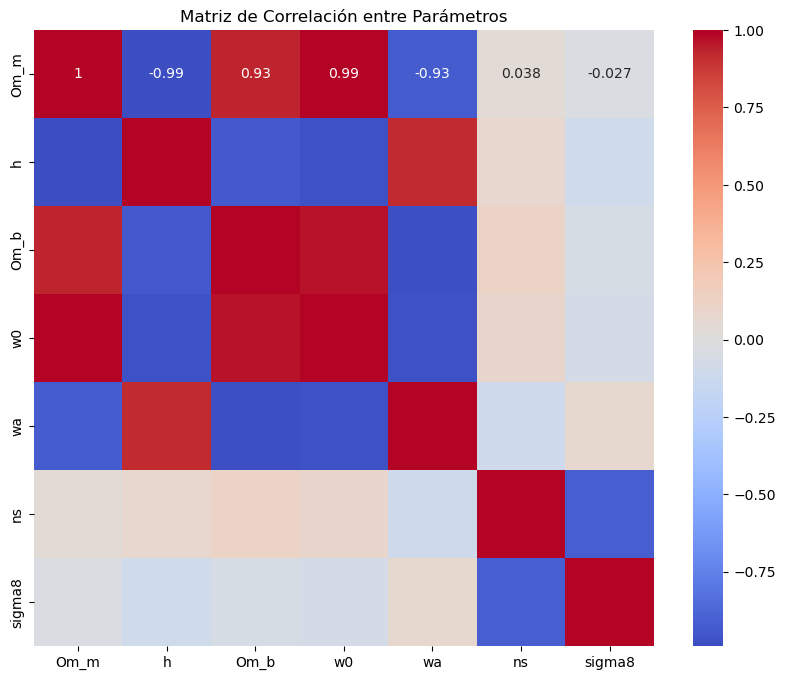

In [105]:
import seaborn as sns

# Invertir la matriz de Fisher para obtener la matriz de covarianza
cov_matrix = inv(Fi_DE_F)

# Calcular la matriz de correlación
diag = np.sqrt(np.diag(cov_matrix))
corr_matrix = cov_matrix / np.outer(diag, diag)

# Etiquetas de los parámetros (puedes ajustarlas según tu modelo)
param_labels = ['Om_m', 'h', 'Om_b', 'w0', 'wa', 'ns', 'sigma8']

# Crear un gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=param_labels, yticklabels=param_labels, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Parámetros')
plt.show()

In [83]:
cov_matrix = inv(Fi_DE_F)

def plot_error_ellipse(ax, cov, pos, nstd=2, **kwargs):
    # Calcula los valores y vectores propios
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ordena los valores propios en orden descendente
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    # El ángulo de rotación de la elipse
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Anchura y altura de la elipse
    width, height = 2 * nstd * np.sqrt(eigvals)
    
    # Crear la elipse
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
    ax.add_patch(ellipse)

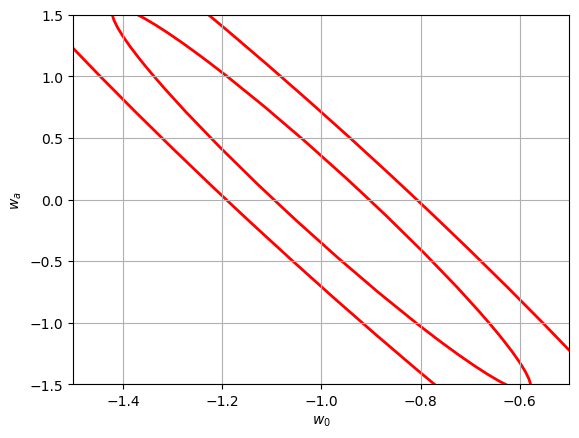

In [84]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([3, 4], [3, 4])]
        
plot_error_ellipse(ax, cov_ij, pos=(-1, 0), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(-1, 0), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.5, 1.5)
        
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_a$')
ax.grid(True)
        
plt.show()

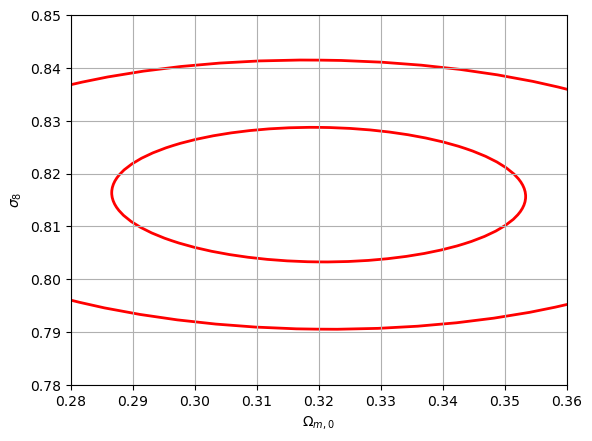

In [85]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 6], [0, 6])]
        
plot_error_ellipse(ax, cov_ij, pos=(0.32, 0.816), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(0.32, 0.816), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(0.28, 0.36)
ax.set_ylim(0.78, 0.85)
        
ax.set_ylabel('$\sigma_8$')
ax.set_xlabel('$\Omega_{m,0}$')
ax.grid(True)
        
plt.show()

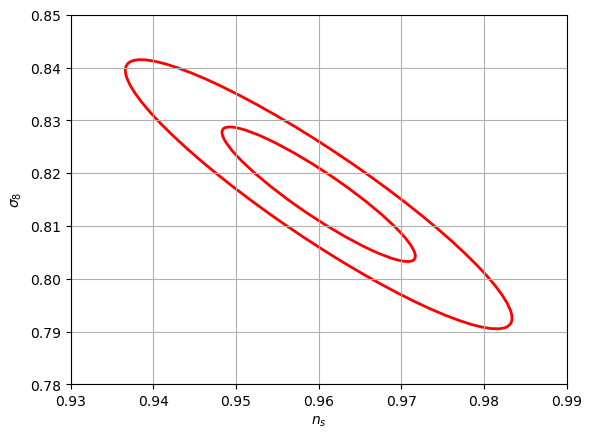

In [101]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([5, 6], [5, 6])]
        
plot_error_ellipse(ax, cov_ij, pos=(0.96, 0.816), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(0.96, 0.816), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_ylim(0.78, 0.85)
ax.set_xlim(0.93, 0.99)
        
ax.set_ylabel('$\sigma_8$')
ax.set_xlabel('$n_s$')
ax.grid(True)
        
plt.show()

# $\Lambda CDM$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_9$

In [102]:
Fi_S_NF = np.array([[12606734.04405812, 13791856.1774819,   1221039.16639302,  -341500.7684234, -805552.14618623,  4498187.21197397],
 [13791856.1774819,  15483080.46924617,  1417512.09228458,  -437097.95394531, -952469.97462595,  5043264.04045177],
 [ 1221039.16639302,  1417512.09228458,   156185.98234141,   -49637.23112899, -118085.75993842,  437819.06903918],
 [ -341500.7684234,   -437097.95394531,  -49637.23112899,   20654.03219881, 35354.90138138, -139436.42718997],
 [ -805552.14618623,  -952469.97462595, -118085.75993842,   35354.90138138, 232772.240892,   -165516.24294163],
 [ 4498187.21197397, 5043264.04045177,  437819.06903918, -139436.42718997, -165516.24294163, 1783001.12745485]])

# $w_0$ and $w_a$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

In [106]:
Fi_DE_NF = np.array([[ 4.58380850e+06,  5.01471891e+06,  4.43969841e+05,
        -1.24169679e+05,  4.73537767e+04,  1.46216501e+04,
        -2.92898760e+05,  1.63554087e+06],
       [ 5.01471891e+06,  5.62964806e+06,  5.15407397e+05,
        -1.58928816e+05,  6.88374027e+04,  1.86079405e+04,
        -3.46318083e+05,  1.83373081e+06],
       [ 4.43969841e+05,  5.15407397e+05,  5.67892232e+04,
        -1.80480972e+04,  7.83141921e+03,  2.18598390e+03,
        -4.29359823e+04,  1.59191014e+05],
       [-1.24169679e+05, -1.58928816e+05, -1.80480972e+04,
         7.50980611e+03, -4.13635414e+03, -8.97307117e+02,
         1.28550421e+04, -5.06990849e+04],
       [ 4.73537767e+04,  6.88374027e+04,  7.83141921e+03,
        -4.13635414e+03,  2.63384569e+03,  4.82599781e+02,
        -5.27835090e+03,  2.28868370e+04],
       [ 1.46216501e+04,  1.86079405e+04,  2.18598390e+03,
        -8.97307117e+02,  4.82599781e+02,  1.09429542e+02,
        -1.53828957e+03,  5.89119658e+03],
       [-2.92898760e+05, -3.46318083e+05, -4.29359823e+04,
         1.28550421e+04, -5.27835090e+03, -1.53828957e+03,
         8.46359868e+04, -6.01817059e+04],
       [ 1.63554087e+06,  1.83373081e+06,  1.59191014e+05,
        -5.06990849e+04,  2.28868370e+04,  5.89119658e+03,
        -6.01817059e+04,  6.48299210e+05]])

cov_matrix = inv(Fi_DE_NF)

print(cov_matrix)

[[ 5.49527910e-03 -5.81839201e-03 -1.11356620e-02 -1.79197559e-01
  -6.93430516e-02 -6.85943912e-01 -1.81765248e-05 -5.96043211e-06]
 [-5.81839201e-03  6.18377759e-03  1.17761005e-02  1.89743336e-01
   7.34727190e-02  7.26332658e-01  6.78341901e-05 -5.31323699e-05]
 [-1.11356620e-02  1.17761005e-02  4.31840744e-02  5.35510781e-01
   2.74185428e-01  1.81005310e+00  1.80710324e-04 -5.20105706e-05]
 [-1.79197559e-01  1.89743336e-01  5.35510781e-01  7.32326013e+00
   3.39834342e+00  2.60713590e+01  1.29241470e-03 -1.70045294e-04]
 [-6.93430516e-02  7.34727190e-02  2.74185428e-01  3.39834342e+00
   1.75412366e+00  1.14623866e+01  1.01711553e-03 -4.36606625e-04]
 [-6.85943912e-01  7.26332658e-01  1.81005310e+00  2.60713590e+01
   1.14623866e+01  9.52249334e+01  2.69670763e-03  7.34692073e-04]
 [-1.81765248e-05  6.78341901e-05  1.80710324e-04  1.29241470e-03
   1.01711553e-03  2.69670763e-03  1.36867246e-04 -1.37024538e-04]
 [-5.96043211e-06 -5.31323699e-05 -5.20105706e-05 -1.70045294e-04
  -

In [107]:
F_wa_w0 = inv(np.array([[1.75412366e+00, 1.14623866e+01], [1.14623866e+01, 9.52249334e+01]]))

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print(FoM)

0.16748280271971833


# $w_0$, $w_a$ and $\gamma$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

9. $\gamma$

In [103]:
F_DE_gamma_NF = np.array([[ 2.25389923e+06,  3.51279207e+06,  6.48520166e+05,
        -2.41957282e+05,  1.25373299e+05,  2.82492450e+04,
        -1.89789135e+05,  1.16685403e+06, -5.83751384e+00],
       [ 3.51279207e+06,  5.57045549e+06,  1.06879730e+06,
        -3.95080352e+05,  2.03046343e+05,  4.61897743e+04,
        -3.40577310e+05,  1.81881889e+06, -1.35838365e+02],
       [ 6.48520166e+05,  1.06879730e+06,  2.47039995e+05,
        -8.34108085e+04,  3.91094312e+04,  9.92797700e+03,
        -8.22482616e+04,  3.30457718e+05, -3.90397422e+01],
       [-2.41957282e+05, -3.95080352e+05, -8.34108085e+04,
         2.99832080e+04, -1.49202740e+04, -3.55198822e+03,
         2.92395712e+04, -1.24333211e+05,  2.13347829e+01],
       [ 1.25373299e+05,  2.03046343e+05,  3.91094312e+04,
        -1.49202740e+04,  7.83380751e+03,  1.75234725e+03,
        -1.43807319e+04,  6.50361482e+04, -1.43991018e+01],
       [ 2.82492450e+04,  4.61897743e+04,  9.92797700e+03,
        -3.55198822e+03,  1.75234725e+03,  4.23360019e+02,
        -3.47530280e+03,  1.44562124e+04, -2.32366407e+00],
       [-1.89789135e+05, -3.40577310e+05, -8.22482616e+04,
         2.92395712e+04, -1.43807319e+04, -3.47530280e+03,
         8.41850297e+04, -5.85142869e+04,  8.78774362e-01],
       [ 1.16685403e+06,  1.81881889e+06,  3.30457718e+05,
        -1.24333211e+05,  6.50361482e+04,  1.44562124e+04,
        -5.85142869e+04,  6.44685992e+05, -5.29138222e+00],
       [-5.83751384e+00, -1.35838365e+02, -3.90397422e+01,
         2.13347829e+01, -1.43991018e+01, -2.32366407e+00,
         8.78774362e-01, -5.29138222e+00,  6.53240860e+00]])